### Author Statement
This project has been developed by Mustafa Neguib who is a student of
Masters of Information Technology at The University of Melbourne.
You can contact the developer at mustafa.neguib@gmail.com
Website: http://www.mustafaneguib.com
github: http://github.com/mustafaneguib/

In [1]:
import os
import numpy as np
import geopandas
import pandas as pd
import ast
from shapely import geometry
from shapely import wkt
from shapely.ops import cascaded_union
import matplotlib.pyplot as plt
import folium
from sklearn.cluster import DBSCAN
from dateutil.parser import parse
import datetime
from rtree import index

from mpl_toolkits.basemap import Basemap
%matplotlib inline  
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)



In [2]:
def create_output_directory():
    # This function is the first one to run, so we want to make sure that the output folder is
    # created before all other functions run.
    try:
        os.mkdir("output")
    except FileExistsError:
        # The folder already exists, so do nothing.
        pass

def read_csv_file(csv_file_name, required_columns):
    """
    This function reads in the csv file and then checks if the file has the correct
    number of columns and also if the column names are correct.
    :param csv_file_name: A string containing the name of the csv file to read.
    :param required_columns: A list containing the column names that are required by this project for the file.
    :return: data_frame is a pandas data frame which contains the data read from the csv file

    """

    execution_halted_str = 'Execution halted in the function read_csv_file!!!'
    path_of_file = os.path.join(os.getcwd(), csv_file_name)
    if os.path.exists(path_of_file):
        data_frame = pd.read_csv(path_of_file)

        if data_frame.columns.size == len(required_columns):

            # This code is checking if the column exists, no matter in what order it comes in the
            # csv file. This means that as long as the column exists in the csv file we do not care,
            # whether it is the first column, or the last column.

            found_invalid_columns = False
            invalid_columns = []
            for column in required_columns:
                try:
                    # If the column is not in the data frame, then a ValueError will be thrown, which
                    # will tell me that there was a problem. If no such error is thrown then the data frame
                    # has all of the required columns.
                    list(data_frame.columns).index(column)
                except ValueError as value_error:
                    found_invalid_columns = True
                    invalid_columns.append(column)

            if found_invalid_columns:
                raise Exception(
                    '{} The csv file {} provided does not contain the column(s) {}.'.format(execution_halted_str,
                                                                                            csv_file_name,
                                                                                            ', '.join(invalid_columns)))
            return data_frame
        else:
            raise Exception(
                "{} The csv file {} does not contain all of the required columns. Please check the file and ensure that the columns and their names are correct.".format(
                    execution_halted_str, csv_file_name))
    else:
        raise FileNotFoundError(
            "{} The csv file {} was not found in the current directory.".format(execution_halted_str, csv_file_name))

def read_excel_file(csv_file_name, required_columns):
    """
    This function reads in the csv file and then checks if the file has the correct
    number of columns and also if the column names are correct.
    :param csv_file_name: A string containing the name of the csv file to read.
    :param required_columns: A list containing the column names that are required by this project for the file.
    :return: data_frame is a pandas data frame which contains the data read from the csv file

    """

    execution_halted_str = 'Execution halted in the function read_csv_file!!!'
    path_of_file = os.path.join(os.getcwd(), csv_file_name)
    if os.path.exists(path_of_file):
        data_frame = pd.read_excel(path_of_file)

        if data_frame.columns.size == len(required_columns):

            # This code is checking if the column exists, no matter in what order it comes in the
            # csv file. This means that as long as the column exists in the csv file we do not care,
            # whether it is the first column, or the last column.

            found_invalid_columns = False
            invalid_columns = []
            for column in required_columns:
                try:
                    # If the column is not in the data frame, then a ValueError will be thrown, which
                    # will tell me that there was a problem. If no such error is thrown then the data frame
                    # has all of the required columns.
                    list(data_frame.columns).index(column)
                except ValueError as value_error:
                    found_invalid_columns = True
                    invalid_columns.append(column)

            if found_invalid_columns:
                raise Exception(
                    '{} The csv file {} provided does not contain the column(s) {}.'.format(execution_halted_str,
                                                                                            csv_file_name,
                                                                                            ', '.join(invalid_columns)))
            return data_frame
        else:
            raise Exception(
                "{} The csv file {} does not contain all of the required columns. Please check the file and ensure that the columns and their names are correct.".format(
                    execution_halted_str, csv_file_name))
    else:
        raise FileNotFoundError(
            "{} The csv file {} was not found in the current directory.".format(execution_halted_str, csv_file_name))


def read_shape_file(shape_file_name, required_columns):
    """
    This function reads in the provided shape file from the disk
    :param shape_file_name:  A string containing the name of the shape file to read.
    :param required_columns: A list containing the column names that are required by this project for the file.
    :return: geo_data_frame is a geopandas data frame which contains the data read from the shape file
    """

    execution_halted_str = 'Execution halted in the function read_shape_file!!!'
    path_of_file = os.path.join(os.getcwd(), shape_file_name)
    if os.path.exists(path_of_file):

        # This code is checking if the column exists, no matter in what order it comes in the
        # csv file. This means that as long as the column exists in the csv file we do not care,
        # whether it is the first column, or the last column.

        geo_data_frame = geopandas.read_file(shape_file_name)
        if geo_data_frame.columns.size == len(required_columns):

            # This code is checking if the column exists, no matter in what order it comes in the
            # csv file. This means that as long as the column exists in the csv file we do not care,
            # whether it is the first column, or the last column.

            found_invalid_columns = False
            invalid_columns = []
            for column in required_columns:
                try:
                    # If the column is not in the data frame, then a ValueError will be thrown, which
                    # will tell me that there was a problem. If no such error is thrown then the data frame
                    # has all of the required columns.
                    list(geo_data_frame.columns).index(column)
                except ValueError as value_error:
                    found_invalid_columns = True
                    invalid_columns.append(column)

            if found_invalid_columns:
                raise Exception(
                    '{} The shape file {} provided does not contain the column(s) {}.'.format(execution_halted_str,
                                                                                              shape_file_name,
                                                                                              ', '.join(
                                                                                                  invalid_columns)))
            return geo_data_frame
        else:
            raise Exception(
                "{} The shape file {} does not contain all of the required columns. Please check the file and ensure that the columns and their names are correct.".format(
                    execution_halted_str, shape_file_name))

    else:
        raise FileNotFoundError(
            "{} The shape file {} was not found in the current directory.".format(execution_halted_str,
                                                                                  shape_file_name))
def read_geojson_file(geojson_file_name, required_columns):
    """
    This function reads in the provided shape file from the disk
    :param geojson_file_name:  A string containing the name of the shape file to read.
    :param required_columns: A list containing the column names that are required by this project for the file.
    :return: geo_data_frame is a geopandas data frame which contains the data read from the shape file
    """

    execution_halted_str = 'Execution halted in the function read_geojson_file!!!'
    path_of_file = os.path.join(os.getcwd(), geojson_file_name)
    if os.path.exists(path_of_file):

        # This code is checking if the column exists, no matter in what order it comes in the
        # csv file. This means that as long as the column exists in the csv file we do not care,
        # whether it is the first column, or the last column.

        geo_data_frame = geopandas.read_file(geojson_file_name)
        if geo_data_frame.columns.size == len(required_columns):

            # This code is checking if the column exists, no matter in what order it comes in the
            # csv file. This means that as long as the column exists in the csv file we do not care,
            # whether it is the first column, or the last column.

            found_invalid_columns = False
            invalid_columns = []
            for column in required_columns:
                try:
                    # If the column is not in the data frame, then a ValueError will be thrown, which
                    # will tell me that there was a problem. If no such error is thrown then the data frame
                    # has all of the required columns.
                    list(geo_data_frame.columns).index(column)
                except ValueError as value_error:
                    found_invalid_columns = True
                    invalid_columns.append(column)

            if found_invalid_columns:
                raise Exception(
                    '{} The geojson file {} provided does not contain the column(s) {}.'.format(execution_halted_str,
                                                                                              geojson_file_name,
                                                                                              ', '.join(
                                                                                                  invalid_columns)))
            return geo_data_frame
        else:
            raise Exception(
                "{} The geojson file {} does not contain all of the required columns. Please check the file and ensure that the columns and their names are correct.".format(
                    execution_halted_str, geojson_file_name))

    else:
        raise FileNotFoundError(
            "{} The geojson file {} was not found in the current directory.".format(execution_halted_str,
                                                                                  geojson_file_name))        
def build_geometry(data):
    """
    This function builds a Shapely Point geometry based on the longitude and latitude values.
    :param data: Pandas data frame
    :return: Shapely Point geometry
    """
    location=data['merchant_long_lat']
    if type(location) is str:
        longitude=location.split()[0]
        longitude=float(ast.literal_eval(longitude))
        latitude=location.split()[1]
        latitude=float(ast.literal_eval(latitude))
        if longitude==0 and latitude==0:
            return None
        else:    
            return geometry.Point(longitude, latitude)
    else:
        return None
    
def build_longitude(data):
    """
    This function builds a Shapely Point geometry based on the longitude and latitude values.
    :param data: Pandas data frame
    :return: Shapely Point geometry
    """
    location=data['merchant_long_lat']
    if type(location) is str:
        longitude=location.split()[0]
        longitude=float(ast.literal_eval(longitude))
        latitude=location.split()[1]
        latitude=float(ast.literal_eval(latitude))
        if longitude==0 and latitude==0:
            return 0
        else:    
            return longitude
    else:
        return 0

    
def build_latitude(data):
    """
    This function builds a Shapely Point geometry based on the longitude and latitude values.
    :param data: Pandas data frame
    :return: Shapely Point geometry
    """
    location=data['merchant_long_lat']
    if type(location) is str:
        longitude=location.split()[0]
        longitude=float(ast.literal_eval(longitude))
        latitude=location.split()[1]
        latitude=float(ast.literal_eval(latitude))
        if longitude==0 and latitude==0:
            return 0
        else:    
            return latitude
    else:
        return 0

def write_to_shape_file(dataframe, file_name):
    """
    This function writes the dataframe to a shape file. This function also ensures
    that the folder output exists.
    :param dataframe: geopandas dataframe
    :param file_name: string name for the file
    :return: string path to the file
    """
    execution_halted_str = 'Execution halted in the function write_to_shape_file!!!'
    path_of_directory = os.path.join(os.getcwd(), "output")
    path_of_file = os.path.join(os.getcwd(), "output", file_name)
    if os.path.exists(path_of_directory):
        dataframe.to_file(path_of_file)
        return path_of_file
    else:
        raise FileNotFoundError(
            "{} The file {} was not found in the current directory.".format(execution_halted_str,
                                                                            path_of_directory))    
        
def write_to_geojson_file(dataframe, file_name):
    """
    This function writes the dataframe to a shape file. This function also ensures
    that the folder output exists.
    :param dataframe: geopandas dataframe
    :param file_name: string name for the file
    :return: string path to the file
    """
    execution_halted_str = 'Execution halted in the function write_to_shape_file!!!'
    path_of_directory = os.path.join(os.getcwd(), "output")
    path_of_file = os.path.join(os.getcwd(), "output", file_name)
    if os.path.exists(path_of_directory):
        dataframe.to_file(path_of_file, driver="GeoJSON")
        return path_of_file
    else:
        raise FileNotFoundError(
            "{} The file {} was not found in the current directory.".format(execution_halted_str,
                                                                            path_of_directory))            

def get_columns_from_data(data, columns):
    """
    This function is a wrapper around the indexing of pandas data frames. This function gets all of the rows
    from the data frame.
    :param data: Pandas data frame
    :param columns: The columns which are to be selected.
    :return: Pandas data frame
    """
    return data.loc[:, columns]


def get_columns_from_data_range_rows(data, start_row, end_row, columns):
    """
    This function is a wrapper around the indexing of pandas data frames. This function gets some of the rows
    from the data frame specified by the start_row and end_row.
    :param data: Pandas data frame
    :param start_row: int value specifying the row to start from
    :param end_row: int value specifying the row to end at
    :param columns: The columns which are to be selected.
    :return: Pandas data frame
    """
    return data.loc[start_row:end_row, columns]   

def group_by_data(data, columns):
    """
    This is a wrapper function which wraps around the pandas group by function.
    :param data: Pandas data frame
    :param columns: The columns which are to be used to be group the data frame on
    :return: Pandas data frame
    """
    return data.groupby(columns).size().to_frame('count').reset_index()

def plot_bar_plot(x, y, x_axis_label, y_axis_label, title):
    """
    This function plots a bar plot of values of x against the y
    :param x: list of x values
    :param y: list of y values
    :param x_axis_label: list of labels for x
    :param y_axis_label: list of labels for y
    :param title: string value for the title of the plot
    :return: the filename of the figure that has been saved.
    """
    fig, ax = plt.subplots()
    ax.bar(x, y)
    ax.set_xlabel(x_axis_label, fontsize=10)
    ax.set_ylabel(y_axis_label, fontsize=10)
    ax.set_xticks(x)
    ax.set_xticklabels(x, fontsize=10, rotation=90)
    ax.set_title(title)
    # ax.legend(loc='upper right', frameon=True)
    plt.show()
    file_name = ((((title + '.png').replace('/', ''))).replace(' ', '_')).lower()
    # fig.savefig('output/' + file_name, dpi=100, bbox_inches='tight')
    return write_to_image_file(fig, file_name, False, 100)

def write_to_image_file(figure, file_name, more_options, dpi):
    """
    This function writes an image file. This function also ensures
    that the folder output exists.
    :param figure: matplotlib figure
    :param file_name: string name of the file
    :param more_options: boolean whether we want more options or not
    :param dpi: int value for the dpi
    :return: string path to the file
    """
    execution_halted_str = 'Execution halted in the function write_to_image_file!!!'
    path_of_directory = os.path.join(os.getcwd(), "output")
    path_of_file = os.path.join(os.getcwd(), "output", file_name)
    if os.path.exists(path_of_directory):
        if more_options:
            figure.savefig(path_of_file, dpi=dpi, cmap='summer', edgecolor='black', linewidth=0.2, alpha=1,
                           bbox_inches='tight')
        else:
            figure.savefig(path_of_file, dpi=dpi, bbox_inches='tight')
        return path_of_file
    else:
        raise FileNotFoundError(
            "{} The file {} was not found in the current directory.".format(execution_halted_str,
                                                                            path_of_directory))

def plot_db_scan(X, model):
    """
    This code plots the clustered points. This function has been inspired from the
    DBSCAN example (https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html) and the example provide
    by Elham https://notebooks.azure.com/ElhamN/projects/GEOM90042-1/html/L6/plotClusters.py
    :param X: a 2D numpy array of coordinates
    :param model: a model containg the DBSCAN result
    """
    # plotting the results
    labels = model.labels_
    core_samples_mask = np.zeros_like(model.labels_, dtype=bool)
    core_samples_mask[model.core_sample_indices_] = True
    print(len(labels))
    # Black removed and is used for noise instead.
    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each)
              for each in np.linspace(0, 1, len(unique_labels))]
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise.
            col = [0, 0, 0, 1]

        class_member_mask = (labels == k)

        xy = X[class_member_mask & core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=6)

        xy = X[class_member_mask & ~core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=6)
        plt.savefig('output/dbscan_cluster1.png', dpi=200, bbox_inches='tight')
        return write_to_image_file(plt, "dbscan_cluster.png", False, 100)

def get_type_of_hour_day(data):
    """
    This function returns a string representation of the type of hour of day
    :param x: int value of hour
    :return: string representation of the type of hour of day
    """
    
    time_of_accident = data['Time Occurred']
    hour = int(time_of_accident/100)
    if hour >= 0 and hour <= 5:
        return 'Early Morning'
    elif hour >= 6 and hour <= 11:
        return 'Morning'
    elif hour >= 12 and hour <= 14:
        return 'Early Afternoon'
    elif hour >= 15 and hour <= 17:
        return 'Afternoon'
    elif hour >= 18 and hour <= 19:
        return 'Early Evening'
    elif hour >= 20 and hour <= 23:
        return 'Night'
    
def categorize_type_of_day(data):
    """
    This function returns either the day provided is a week day or a weekend.
    :param x: string value of day
    :return: string
    """
    date_of_accident = parse(data['Date Occurred'].split('T')[0])
    weekDays = ("Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday")
    day_type = weekDays[date_of_accident.weekday()]

    if day_type == 'Monday':
        return 'Week Day'
    elif day_type == 'Tuesday':
        return 'Week Day'
    elif day_type == 'Wednesday':
        return 'Week Day'
    elif day_type == 'Thursday':
        return 'Week Day'
    elif day_type == 'Friday':
        return 'Week Day'
    else:
        return 'Weekend'   
    
def seperate_years(data):
    return parse(data['Date Occurred'].split('T')[0]).year    

def concat_day_hour_type(data):
    return data['DAY_TYPE']+'-'+data['HOUR_TYPE']

def specify_descent(data):
    descents={
    "A":"Other Asian", "B":"Black","C":"Chinese","D":"Cambodian",
    "F":"Filipino","G":"Guamanian","H":"Hispanic/Latin/Mexican",
    "I":"American Indian/Alaskan Native","J":"Japanese",
    "K":"Korean","L":"Laotian","O":"Other","P":"Pacific Islander",
    "S":"Samoan","U":"Hawaiian","V":"Vietnamese","W":"White",
    "X":"Unknown","Z":"Asian Indian"
    }
    return descents[data['Victim Descent']]

def generate_range_bins(bins):
    """
    This function returns generates a range bin from a list of increasing numbers.
    :param bins: list of numbers
    :return: string representation of a range
    """
    bins = [int(x) for x in bins]
    bins_sets=[]
    for i, val in enumerate(bins):
        if i==0:
            bins_sets.append((bins[i],bins[i+1]))
        elif i>0 and i<len(bins)-1:
            bins_sets.append((bins[i]+1,bins[i+1]))
    return bins_sets

def get_range(numerical_value, bins):
    bins_sets=generate_range_bins(bins)
    range=""
    for bin in bins_sets:
        if numerical_value >= bin[0] and numerical_value<=bin[1]:
            range="{}-{}".format(bin[0],bin[1])
            break

    if range is "":
        return "{}+".format(bins_sets[-1][1])
    else:
        return range 
    
    
def sort_ranges(range_bin, ranges, count_list):
    # The following code gets the order of the range according to the bin associated with that range, and then 
    # in the end sorts the ranges based on the index that has been retrieved bringing the ranges in the correct order.
    range_bins=[]
    for i,r in enumerate(ranges):
        if '+' in r:
            p1=int(r.split('+')[0])            
            if p1>= range_bin[-1][1]:
                range_bins.append([len(range_bin)-1,r, count_list[i]])
        else:            
            p1=int(r.split('-')[0])
            p2=int(r.split('-')[1])
            index=range_bin.index((p1,p2))
            range_bins.append([index,r, count_list[i]])
    range_bins=sorted(range_bins, key=lambda x: x[0])
    range_bin=[x[1] for x in range_bins]
    range_counts=[x[2] for x in range_bins]
    return range_bin, range_counts

def plot_coords_basemap(x, y, x_axis_label, y_axis_label, title):
    fig = plt.figure(num=None, figsize=(12, 8)) 
    ax=fig.add_subplot()
    ax.set_title(title)
    map=Basemap(width=6000000,height=4500000,resolution='c',projection='aea',lon_0=135,lat_0=-27)
    map.drawmapboundary(fill_color='lightblue')
    map.fillcontinents(color='tan',lake_color='lightblue')
    map.drawparallels(np.arange(-90.,91.,15.),labels=[True,True,False,False],dashes=[2,2])
    map.drawmeridians(np.arange(-180.,181.,15.),labels=[False,False,False,True],dashes=[2,2])
    map.drawmapboundary(fill_color='lightblue')
    map.drawcountries(linewidth=2, linestyle='solid', color='k' ) 
    map.drawstates(linewidth=0.5, linestyle='solid', color='k')
    map.drawrivers(linewidth=0.5, linestyle='solid', color='blue')
    map.drawcoastlines(linewidth=0.5)
    for i,coord in enumerate(x):
        x1, y1 = map(x[i],y[i])
        map.plot(x1, y1, marker='D',color='b')
    plt.show()
    file_name = ((((title + '.png').replace('/', ''))).replace(' ', '_')).lower()
    fig.savefig(file_name,dpi=100, bbox_inches='tight')

In [3]:
create_output_directory()

In [4]:
required_columns = ["status","card_present_flag","bpay_biller_code","account","currency","long_lat","txn_description","merchant_id","merchant_code","first_name","balance","date","gender","age","merchant_suburb","merchant_state","extraction","amount","transaction_id","country","customer_id","merchant_long_lat","movement"]
data_frame = read_excel_file("anz_dataset.xlsx", required_columns)

In [5]:
data_frame.columns

Index(['status', 'card_present_flag', 'bpay_biller_code', 'account',
       'currency', 'long_lat', 'txn_description', 'merchant_id',
       'merchant_code', 'first_name', 'balance', 'date', 'gender', 'age',
       'merchant_suburb', 'merchant_state', 'extraction', 'amount',
       'transaction_id', 'country', 'customer_id', 'merchant_long_lat',
       'movement'],
      dtype='object')

In [6]:
data_frame.head()
salary_trans = data_frame[data_frame['txn_description']=='PAY/SALARY']
#accidents_locations_area_name=get_columns_from_data(accidents_locations_zones, ['DR Number','Area Name'])
male_salary=salary_trans[salary_trans['gender']=='M']
female_salary=salary_trans[salary_trans['gender']=='F']

In [7]:
average_male_salary=male_salary['amount'].values.mean()
average_female_salary=female_salary['amount'].values.mean()

In [8]:
average_male_salary

2096.811681034483

In [9]:
average_female_salary

1679.370477326969

In [10]:
#male_salary['amount'].plot(kind='bar')
#anz_transactions_pos_pos_sales = anz_transactions[(anz_transactions['txn_description']=='POS') | (anz_transactions['txn_description']=='SALES-POS')]

In [11]:
data_frame['geometry'] = data_frame.apply(build_geometry, axis=1)
data_frame['longitude'] = data_frame.apply(build_longitude, axis=1)
data_frame['latitude'] = data_frame.apply(build_latitude, axis=1)
# Only the POS POS-SALE have geometries which are not null
anz_transactions_pos_pos_sales = data_frame.loc[data_frame['geometry'].notnull()]
anz_transactions_pos_pos_sales = geopandas.GeoDataFrame(anz_transactions_pos_pos_sales, geometry=anz_transactions_pos_pos_sales.geometry)
anz_transactions_pos_pos_sales.crs = {'init': 'epsg:4326', 'no_defs': True}
age_bins=np.linspace(anz_transactions_pos_pos_sales['age'].values.min(),anz_transactions_pos_pos_sales['age'].values.max(), 10)
age_range_bins=generate_range_bins(age_bins)
anz_transactions_pos_pos_sales['AGE_RANGE']=anz_transactions_pos_pos_sales['age'].apply(get_range, args=(age_bins,))
age_bins=np.linspace(anz_transactions_pos_pos_sales['age'].values.min(),anz_transactions_pos_pos_sales['age'].values.max(), 10)
age_range_bins=generate_range_bins(age_bins)
salary_trans['AGE_RANGE']=salary_trans['age'].apply(get_range, args=(age_bins,))


C:\Users\Mustafa Neguib\Anaconda3\envs\osmnx_text\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


In [12]:
#get_columns_from_data(anz_transactions_pos_pos_sales,[])
anz_transactions_pos_pos_sales.columns

Index(['status', 'card_present_flag', 'bpay_biller_code', 'account',
       'currency', 'long_lat', 'txn_description', 'merchant_id',
       'merchant_code', 'first_name', 'balance', 'date', 'gender', 'age',
       'merchant_suburb', 'merchant_state', 'extraction', 'amount',
       'transaction_id', 'country', 'customer_id', 'merchant_long_lat',
       'movement', 'geometry', 'longitude', 'latitude', 'AGE_RANGE'],
      dtype='object')

In [13]:
#anz_transactions_pos_pos_sales
#write_to_geojson_file(anz_transactions_pos_pos_sales,"anz_transactions_pos_pos_sales.geojson")
#anz_transactions_pos_pos_sales.plot()
y=anz_transactions_pos_pos_sales['latitude'].values
x=anz_transactions_pos_pos_sales['longitude'].values
x_axis_label=''
y_axis_label=''
x[0]
y[0]

-27.99

In [14]:
'''title='Test'
fig, ax = plt.subplots()
ax.scatter(x, y)
ax.set_xlabel(x_axis_label, fontsize=10)
ax.set_ylabel(y_axis_label, fontsize=10)
#ax.set_xticks(x)
#ax.set_xticklabels(x, fontsize=10, rotation=30)
ax.set_title(title)
# ax.legend(loc='upper right', frameon=True)
plt.show()
'''

"title='Test'\nfig, ax = plt.subplots()\nax.scatter(x, y)\nax.set_xlabel(x_axis_label, fontsize=10)\nax.set_ylabel(y_axis_label, fontsize=10)\n#ax.set_xticks(x)\n#ax.set_xticklabels(x, fontsize=10, rotation=30)\nax.set_title(title)\n# ax.legend(loc='upper right', frameon=True)\nplt.show()\n"

In [15]:
x[0],y[0]

(153.38, -27.99)

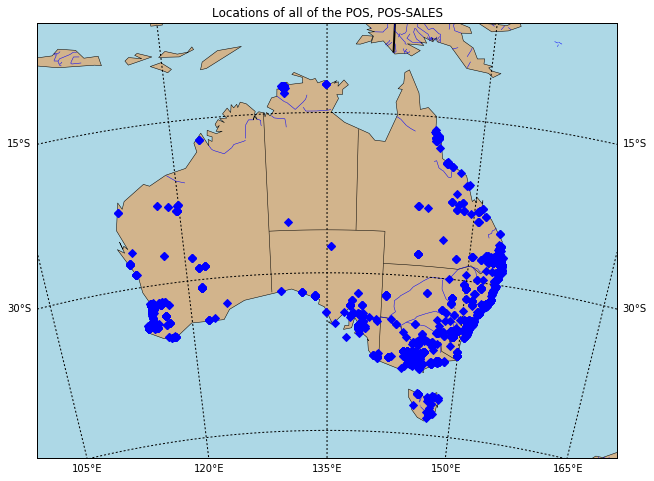

In [16]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
fig = plt.figure(num=None, figsize=(12, 8)) 
ax=fig.add_subplot()
ax.set_title('Locations of all of the POS, POS-SALES')
map=Basemap(width=6000000,height=4500000,resolution='c',projection='aea',lon_0=135,lat_0=-27)
map.drawmapboundary(fill_color='lightblue')
map.fillcontinents(color='tan',lake_color='lightblue')
map.drawparallels(np.arange(-90.,91.,15.),labels=[True,True,False,False],dashes=[2,2])
map.drawmeridians(np.arange(-180.,181.,15.),labels=[False,False,False,True],dashes=[2,2])
map.drawmapboundary(fill_color='lightblue')
map.drawcountries(linewidth=2, linestyle='solid', color='k' ) 
map.drawstates(linewidth=0.5, linestyle='solid', color='k')
map.drawrivers(linewidth=0.5, linestyle='solid', color='blue')
map.drawcoastlines(linewidth=0.5)
for i,coord in enumerate(x):
    x1, y1 = map(x[i],y[i])
    map.plot(x1, y1, marker='D',color='b')
plt.show()
fig.savefig('locations_pos_pos_sales.png',dpi=100, bbox_inches='tight')

In [17]:
grouped_by_age=group_by_data(anz_transactions_pos_pos_sales,['AGE_RANGE'])
grouped_by_age

,AGE_RANGE,count
0,18-24,2603
1,25-31,2216
2,32-38,1446
3,39-44,1111
4,45-51,135
5,52-58,91
6,59-64,59
7,65-71,53
8,72-78,3


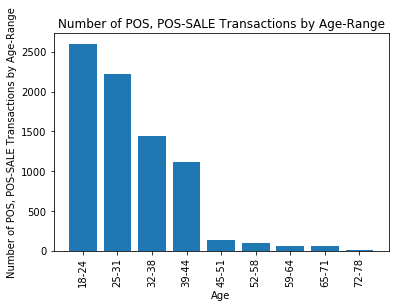

'D:\\data analysis\\anz internship\\task1\\output\\number_of_pos,_pos-sale_transactions_by_age-range.png'

In [18]:
grouped_age = list(grouped_by_age['AGE_RANGE'])
grouped_age_count=list(grouped_by_age['count'])
grouped_age, grouped_age_count=sort_ranges(age_range_bins, grouped_age, grouped_age_count)
plot_bar_plot(grouped_age, grouped_age_count, 'Age', 'Number of POS, POS-SALE Transactions by Age-Range',
                              'Number of POS, POS-SALE Transactions by Age-Range')


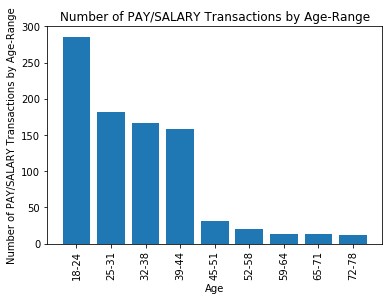

'D:\\data analysis\\anz internship\\task1\\output\\number_of_paysalary_transactions_by_age-range.png'

In [19]:
#salary_trans = anz_transactions[(anz_transactions['txn_description']=='PAY/SALARY')]
grouped_by_age=group_by_data(salary_trans,['AGE_RANGE'])
grouped_by_age
grouped_age = list(grouped_by_age['AGE_RANGE'])
grouped_age_count=list(grouped_by_age['count'])
plot_bar_plot(grouped_age, grouped_age_count, 'Age', 'Number of PAY/SALARY Transactions by Age-Range',
                              'Number of PAY/SALARY Transactions by Age-Range')

C:\Users\Mustafa Neguib\Anaconda3\envs\osmnx_text\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


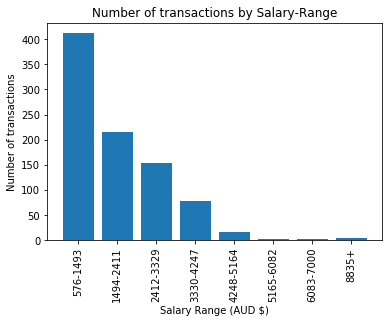

'D:\\data analysis\\anz internship\\task1\\output\\number_of_transactions_by_salary-range.png'

In [20]:
salary_bins=np.linspace(salary_trans['amount'].values.min(),salary_trans['amount'].values.max(), 10)
salary_range_bins=generate_range_bins(salary_bins)
salary_trans['SALARY_RANGE']=salary_trans['amount'].apply(get_range, args=(salary_bins,))
grouped_by_salary=group_by_data(salary_trans,['SALARY_RANGE'])
grouped_salary = list(grouped_by_salary['SALARY_RANGE'])
grouped_salary_count=list(grouped_by_salary['count'])
grouped_salary, grouped_salary_count=sort_ranges(salary_range_bins, grouped_salary, grouped_salary_count)
plot_bar_plot(grouped_salary, grouped_salary_count, 'Salary Range (AUD $)', 'Number of transactions',
                             'Number of transactions by Salary-Range')

In [21]:
grouped_data=group_by_data(anz_transactions_pos_pos_sales,['first_name','customer_id'])
top_5_pos_pos_sale_customers = grouped_data.reset_index(drop=True).sort_values('count', ascending=False).head(5)
top_5_pos_pos_sale_customers

,first_name,customer_id,count
21,Diana,CUS-2487424745,531
65,Michael,CUS-2142601169,276
96,Tonya,CUS-3026014945,248
75,Rhonda,CUS-1614226872,220
36,Jeffrey,CUS-860700529,206


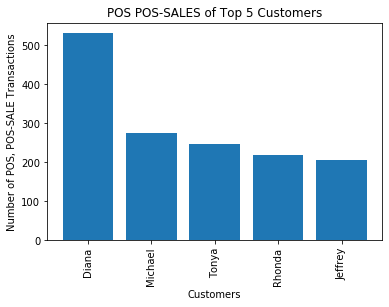

'D:\\data analysis\\anz internship\\task1\\output\\pos_pos-sales_of_top_5_customers.png'

In [22]:
plot_bar_plot(top_5_pos_pos_sale_customers['first_name'].values, top_5_pos_pos_sale_customers['count'].values, 'Customers', 'Number of POS, POS-SALE Transactions',
                             'POS POS-SALES of Top 5 Customers')

In [23]:
#top_5_pos_pos_sale_customers['customer_id'].iloc[0]
top_5_customers_pos=[]
for customer_id in top_5_pos_pos_sale_customers['customer_id']:
    customer=anz_transactions_pos_pos_sales[anz_transactions_pos_pos_sales['customer_id']==customer_id]
    #print(customer.shape)
    for i in range(customer.shape[0]):
        top_5_customers_pos.append(customer.iloc[i])



In [24]:
customer_id=top_5_pos_pos_sale_customers['customer_id']
customer=anz_transactions_pos_pos_sales[anz_transactions_pos_pos_sales['customer_id']==customer_id.iloc[0]]
customer['longitude'].iloc[0]


153.38

In [25]:
'''m = folium.Map(
        location=[customer['latitude'].iloc[0],
                  customer['longitude'].iloc[0]],
        zoom_start=15)

for i in range(customer.shape[0]):
    folium.CircleMarker(
        location=[customer['latitude'].iloc[i], customer['longitude'].iloc[i]],
        radius=5,
        color='#ff0000',
        fill=True,
        fill_color='#ff0000'
    ).add_to(m)
m'''

"m = folium.Map(\n        location=[customer['latitude'].iloc[0],\n                  customer['longitude'].iloc[0]],\n        zoom_start=15)\n\nfor i in range(customer.shape[0]):\n    folium.CircleMarker(\n        location=[customer['latitude'].iloc[i], customer['longitude'].iloc[i]],\n        radius=5,\n        color='#ff0000',\n        fill=True,\n        fill_color='#ff0000'\n    ).add_to(m)\nm"

In [26]:
grouped_by_state=group_by_data(customer,['merchant_state'])
most_number_of_pos_transactions=grouped_by_state.reset_index(drop=True).sort_values('count', ascending=False).head(1)
print("The customer {} has shopped in {} a number of {} times.".format(customer['first_name'].iloc[0],most_number_of_pos_transactions['merchant_state'].iloc[0],most_number_of_pos_transactions['count'].iloc[0]))

The customer Diana has shopped in QLD a number of 444 times.


In [27]:
customer_id=top_5_pos_pos_sale_customers['customer_id']
customer=anz_transactions_pos_pos_sales[anz_transactions_pos_pos_sales['customer_id']==customer_id.iloc[1]]

In [28]:
'''customer['latitude']
m = folium.Map(
        location=[customer['latitude'].iloc[0],
                  customer['longitude'].iloc[0]],
        zoom_start=15)

for i in range(customer.shape[0]):
    folium.CircleMarker(
        location=[customer['latitude'].iloc[i], customer['longitude'].iloc[i]],
        radius=5,
        color='#ff0000',
        fill=True,
        fill_color='#ff0000'
    ).add_to(m)
m'''

"customer['latitude']\nm = folium.Map(\n        location=[customer['latitude'].iloc[0],\n                  customer['longitude'].iloc[0]],\n        zoom_start=15)\n\nfor i in range(customer.shape[0]):\n    folium.CircleMarker(\n        location=[customer['latitude'].iloc[i], customer['longitude'].iloc[i]],\n        radius=5,\n        color='#ff0000',\n        fill=True,\n        fill_color='#ff0000'\n    ).add_to(m)\nm"

In [29]:
grouped_by_state=group_by_data(customer,['merchant_state'])
most_number_of_pos_transactions=grouped_by_state.reset_index(drop=True).sort_values('count', ascending=False).head(1)
print("The customer {} has shopped in {} a number of {} times.".format(customer['first_name'].iloc[0],most_number_of_pos_transactions['merchant_state'].iloc[0],most_number_of_pos_transactions['count'].iloc[0]))

The customer Michael has shopped in NSW a number of 227 times.


In [30]:
print("Top States of the top 5 customers where they have shopped in:")
customer_id=top_5_pos_pos_sale_customers['customer_id']
for c_id in customer_id:
    customer=anz_transactions_pos_pos_sales[anz_transactions_pos_pos_sales['customer_id']==c_id]
    grouped_by_state=group_by_data(customer,['merchant_state'])
    most_number_of_pos_transactions=grouped_by_state.reset_index(drop=True).sort_values('count', ascending=False).head(1)
    print("The customer {} has shopped in {} a number of {} times.".format(customer['first_name'].iloc[0],most_number_of_pos_transactions['merchant_state'].iloc[0],most_number_of_pos_transactions['count'].iloc[0]))

Top States of the top 5 customers where they have shopped in:
The customer Diana has shopped in QLD a number of 444 times.
The customer Michael has shopped in NSW a number of 227 times.
The customer Tonya has shopped in WA a number of 191 times.
The customer Rhonda has shopped in QLD a number of 185 times.
The customer Jeffrey has shopped in QLD a number of 173 times.


In [31]:
#required_coumns=['MB_CODE16','MB_CAT16','SA1_MAIN16','SA1_7DIG16','SA2_5DIG16','SA2_NAME16','']
#tas=read_shape_file('data/1270055001_mb_2016_tas_shape/MB_2016_TAS.shp',required_columns)
#tas=geopandas.read_file('data/1270055001_mb_2016_tas_shape/MB_2016_TAS.shp')

In [32]:
#tas.plot()

In [33]:
#tas = geopandas.GeoDataFrame(tas, geometry=tas.geometry)
#tas.crs = {'init': 'epsg:4326', 'no_defs': True}

In [34]:
#tas.geometry
#P = wkt.loads(tas.iloc[1].geometry.wkt)
#P=tas.iloc[3].geometry.union(tas.iloc[2].geometry).union(tas.iloc[1].geometry)
#for i in range(2,tas.shape[0]):
#geom1 = [geom.geometry for i in tas]
#cascaded_union(geom1)    
#geom1[3]
#tas.iloc[5]

In [35]:
#tas.iloc[2].geometry
#tas.iloc[3].geometry.union(tas.iloc[2].geometry).union(tas.iloc[1].geometry)

#P
#P = wkt.loads(tas.iloc[1].geometry.wkt)
#P.union(tas.iloc[2].geometry)
#P.centroid

In [36]:
#polygons = [geometry.Point(i, 0).buffer(0.7) for i in range(5)]

In [37]:
#polygons

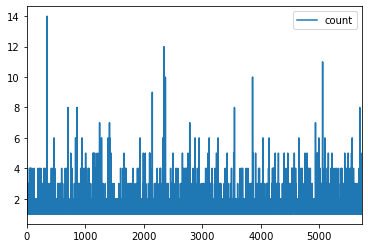

In [38]:
#The most that a merchant has sold is atmost two two customers.
grouped_by_merchants=group_by_data(anz_transactions_pos_pos_sales,['merchant_id'])
grouped_by_merchants.plot()
#most_number_of_pos_transactions=grouped_by_state.reset_index(drop=True).sort_values('count', ascending=False).head(1)
#print("The customer {} has shopped in {} a number of {} times.".format(customer['first_name'].iloc[0],most_number_of_pos_transactions['merchant_state'].iloc[0],most_number_of_pos_transactions['count'].iloc[0]))

In [39]:
top_5_merchants_pos_pos_sales_transactions=grouped_by_merchants.reset_index(drop=True).sort_values('count', ascending=False).head(5)

In [40]:
total_sales_by_top_5_merchants=[]
for index in range(top_5_merchants_pos_pos_sales_transactions.shape[0]):
    merchant_id=top_5_merchants_pos_pos_sales_transactions['merchant_id'].iloc[index]
    merchant_transactions=anz_transactions_pos_pos_sales[anz_transactions_pos_pos_sales['merchant_id']==merchant_id]
    total=0
    number_sales=0
    for index1 in range(merchant_transactions.shape[0]):
        total+=merchant_transactions['amount'].iloc[index1]
        number_sales+=1
    total_sales_by_top_5_merchants.append({'total sales': total,'merchant_id':merchant_id,'merchant_state':merchant_transactions['merchant_state'].iloc[index1],'number_sales':number_sales})
total_sales_by_top_5_merchants

[{'total sales': 368.67,
  'merchant_id': '106e1272-44ab-4dcb-a438-dd98e0071e51',
  'merchant_state': 'NSW',
  'number_sales': 14},
 {'total sales': 232.21999999999997,
  'merchant_id': '6c84c219-96ea-4c6f-9de5-0a28bcaec62f',
  'merchant_state': 'NSW',
  'number_sales': 12},
 {'total sales': 185.56,
  'merchant_id': 'e28c426d-cbef-4e2d-aa06-1ba0b6b1902f',
  'merchant_state': 'NSW',
  'number_sales': 11},
 {'total sales': 193.41000000000003,
  'merchant_id': '6ddddc40-5b69-4253-8a26-167999a8bf96',
  'merchant_state': 'VIC',
  'number_sales': 10},
 {'total sales': 148.17,
  'merchant_id': 'aef30de1-c67e-4ab7-8577-2931a4bf3c7e',
  'merchant_state': 'QLD',
  'number_sales': 10}]

In [41]:
anz_transactions_pos_pos_sales['MONTH']=anz_transactions_pos_pos_sales['date'].map(lambda x: x.month)
grouped_data_by_customer=group_by_data(anz_transactions_pos_pos_sales,['first_name','customer_id'])
grouped_data_by_customer_with_date_amount=group_by_data(anz_transactions_pos_pos_sales,['first_name','customer_id','MONTH','amount'])

In [42]:
#grouped_data_by_customer_with_date_amount.head()

In [43]:
desc_order=grouped_data_by_customer.reset_index(drop=True).sort_values('count', ascending=False).head(5)

In [44]:
month_sets=set()
for i in range(anz_transactions_pos_pos_sales.shape[0]):
    date=anz_transactions_pos_pos_sales['MONTH'].iloc[i]
    month_sets.add(date)

#This code gets the customer's median, mean and total spending per month for the top 5 most active customers
customers_average_monthly_costs=[]

for i in range(desc_order.shape[0]):
    customer_id=desc_order['customer_id'].iloc[i]
    first_name=desc_order['first_name'].iloc[i]
    cust=grouped_data_by_customer_with_date_amount[grouped_data_by_customer_with_date_amount['customer_id']==customer_id]
    #print(cust)
    for j in range(cust.shape[0]):
        customer_month=[]
        for k in month_sets:
            median=0
            mean=0
            total=0
            #print(cust[cust['MONTH']==k]['amount'].values)
            median=np.median(cust[cust['MONTH']==k]['amount'].values)
            mean=np.mean(cust[cust['MONTH']==k]['amount'].values)
            total=np.sum(cust[cust['MONTH']==k]['amount'].values)
            customer_month.append({'month':k,'median':median,'mean':mean,'sum':total})
        
        customers_average_monthly_costs.append({'customer_id':customer_id,'first_name':first_name,'number_transactions':cust.shape[0],'monthly':customer_month})
        break   

In [45]:
customers_average_monthly_costs[0]

{'customer_id': 'CUS-2487424745',
 'first_name': 'Diana',
 'number_transactions': 506,
 'monthly': [{'month': 8,
   'median': 9.73,
   'mean': 17.548895705521474,
   'sum': 2860.4700000000003},
  {'month': 9, 'median': 11.305, 'mean': 13.566341463414634, 'sum': 2224.88},
  {'month': 10,
   'median': 11.64,
   'mean': 25.05251396648045,
   'sum': 4484.400000000001}]}

In [46]:
median_8=[]
median_9=[]
median_10=[]
mean_8=[]
mean_9=[]
mean_10=[]
months=['January','February','March','April','May','June','July','August','September','October','November','December']
print("Average spending by customer for each month:")
for customer in customers_average_monthly_costs:
    print("Customer: {}, First Name: {}, Number of transactions: {}".format(customer['customer_id'], customer['first_name'], customer['number_transactions']))
    for monthly in customer['monthly']:
        if monthly['month']==8:
            median_8.append(round(monthly['median'],2))
            mean_8.append(round(monthly['mean'],2))
        elif monthly['month']==9:
            median_9.append(round(monthly['median'],2))
            mean_9.append(round(monthly['mean'],2))
        elif monthly['month']==10:
            median_10.append(round(monthly['median'],2))
            mean_10.append(round(monthly['mean'],2))
        print("month: {}, median: {}, mean: {}".format(months[monthly['month']-1],monthly['median'],monthly['mean']))
    print("\n")
median_8=tuple(median_8)  
median_9=tuple(median_9)  
median_10=tuple(median_10)
mean_8=tuple(mean_8)
mean_9=tuple(mean_9)
mean_10=tuple(mean_10)

Average spending by customer for each month:
Customer: CUS-2487424745, First Name: Diana, Number of transactions: 506
month: August, median: 9.73, mean: 17.548895705521474
month: September, median: 11.305, mean: 13.566341463414634
month: October, median: 11.64, mean: 25.05251396648045


Customer: CUS-2142601169, First Name: Michael, Number of transactions: 274
month: August, median: 14.045, mean: 21.735697674418603
month: September, median: 15.03, mean: 51.23494736842105
month: October, median: 13.83, mean: 31.52849462365591


Customer: CUS-3026014945, First Name: Tonya, Number of transactions: 246
month: August, median: 17.93, mean: 26.351595744680846
month: September, median: 17.979999999999997, mean: 30.999411764705883
month: October, median: 15.870000000000001, mean: 22.843571428571426


Customer: CUS-1614226872, First Name: Rhonda, Number of transactions: 218
month: August, median: 22.89, mean: 33.656891891891895
month: September, median: 22.22, mean: 30.144523809523815
month: Oct

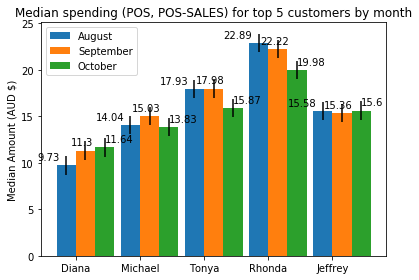

In [47]:
ind = np.arange(len(median_8))  # the x locations for the groups
width = 0.30  # the width of the bars

ones=(1,1,1,1,1)

fig, ax = plt.subplots()
rects1 = ax.bar(ind-width/2, median_8, width, yerr=ones,
                label='August')
rects2 = ax.bar(ind+width/2, median_9, width, yerr=ones,
                label='September')
rects3 = ax.bar((ind+width/2)+width, median_10, width, yerr=ones,
                label='October')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Median Amount (AUD $)')
ax.set_title('Median spending (POS, POS-SALES) for top 5 customers by month')
ax.set_xticks(ind)
ax.set_xticklabels(('Diana', 'Michael', 'Tonya', 'Rhonda', 'Jeffrey'))
ax.legend()


def autolabel(rects, xpos='center'):
    """
    Attach a text label above each bar in *rects*, displaying its height.

    *xpos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.
    """

    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0, 'right': 1, 'left': -1}

    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 3, height),
                    xytext=(offset[xpos]*3, 3),  # use 3 points offset
                    textcoords="offset points",  # in both directions
                    ha=ha[xpos], va='bottom')


autolabel(rects1, "left")
autolabel(rects2, "center")
autolabel(rects3, "right")

fig.tight_layout()

plt.show()
fig.savefig('median_spending_top5.png',dpi=100, bbox_inches='tight')

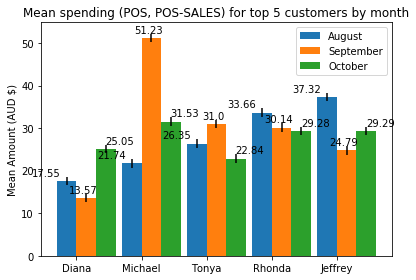

In [48]:
ind = np.arange(len(mean_8))  # the x locations for the groups
width = 0.30  # the width of the bars

ones=(1,1,1,1,1)

fig, ax = plt.subplots()
rects1 = ax.bar(ind-width/2, mean_8, width, yerr=ones,
                label='August')
rects2 = ax.bar(ind+width/2, mean_9, width, yerr=ones,
                label='September')
rects3 = ax.bar((ind+width/2)+width, mean_10, width, yerr=ones,
                label='October')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Mean Amount (AUD $)')
ax.set_title('Mean spending (POS, POS-SALES) for top 5 customers by month')
ax.set_xticks(ind)
ax.set_xticklabels(('Diana', 'Michael', 'Tonya', 'Rhonda', 'Jeffrey'))
ax.legend()


def autolabel(rects, xpos='center'):
    """
    Attach a text label above each bar in *rects*, displaying its height.

    *xpos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.
    """

    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0, 'right': 1, 'left': -1}

    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 3, height),
                    xytext=(offset[xpos]*3, 3),  # use 3 points offset
                    textcoords="offset points",  # in both directions
                    ha=ha[xpos], va='bottom')


autolabel(rects1, "left")
autolabel(rects2, "center")
autolabel(rects3, "right")

fig.tight_layout()

plt.show()
fig.savefig('mean_spending_top5.png',dpi=100, bbox_inches='tight')

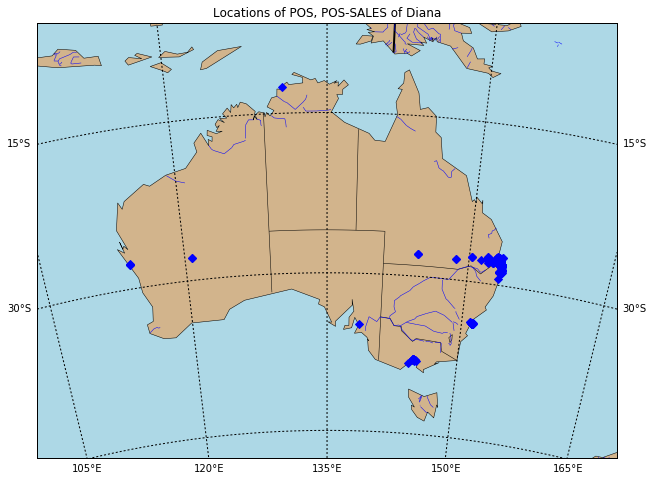

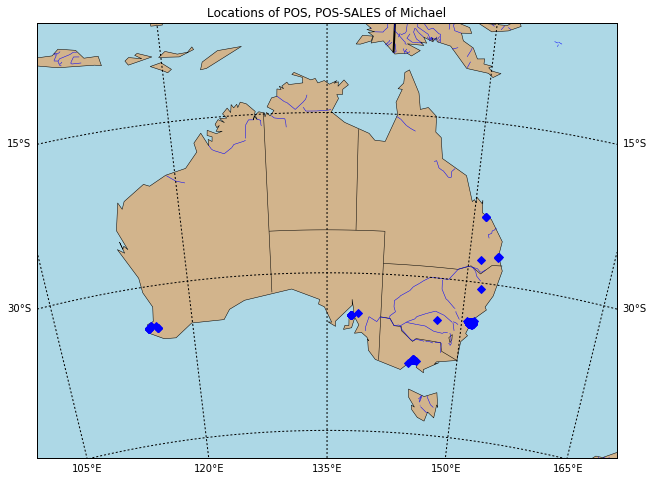

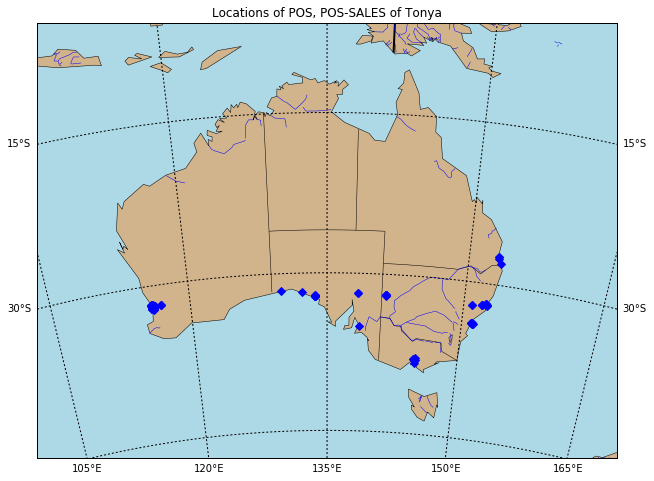

In [ ]:
x_axis_label=''
y_axis_label=''
customer_id=top_5_pos_pos_sale_customers['customer_id']
for c_id in customer_id:
    customer=anz_transactions_pos_pos_sales[anz_transactions_pos_pos_sales['customer_id']==c_id]
    y=customer['latitude'].values
    x=customer['longitude'].values
    title='Locations of POS, POS-SALES of {}'.format(customer['first_name'].iloc[0])
    #grouped_by_state=group_by_data(customer,['merchant_state'])
    #most_number_of_pos_transactions=grouped_by_state.reset_index(drop=True).sort_values('count', ascending=False).head(1)
    #print("The customer {} has shopped in {} a number of {} times.".format(customer['first_name'].iloc[0],most_number_of_pos_transactions['merchant_state'].iloc[0],most_number_of_pos_transactions['count'].iloc[0]))
    plot_coords_basemap(x, y, x_axis_label, y_axis_label, title)
#y=anz_transactions_pos_pos_sales['latitude'].values
#x=anz_transactions_pos_pos_sales['longitude'].values

